In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('data/train.csv').drop('id',axis=1)
test=pd.read_csv('data/test.csv').drop('id',axis=1)
submission=pd.read_csv('data/submission.csv',index_col=0)

In [3]:
train_cpy=train.copy()
test_cpy=test.copy()
submission_cpy=submission.copy()

In [4]:
train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    715 non-null    int64  
 1   hour_bef_temperature    714 non-null    float64
 2   hour_bef_precipitation  714 non-null    float64
 3   hour_bef_windspeed      714 non-null    float64
 4   hour_bef_humidity       714 non-null    float64
 5   hour_bef_visibility     714 non-null    float64
 6   hour_bef_ozone          680 non-null    float64
 7   hour_bef_pm10           678 non-null    float64
 8   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [8]:
train_cpy.nunique()

hour                       24
hour_bef_temperature      245
hour_bef_precipitation      2
hour_bef_windspeed         73
hour_bef_humidity          91
hour_bef_visibility       781
hour_bef_ozone             95
hour_bef_pm10             148
hour_bef_pm2.5             79
count                     314
dtype: int64

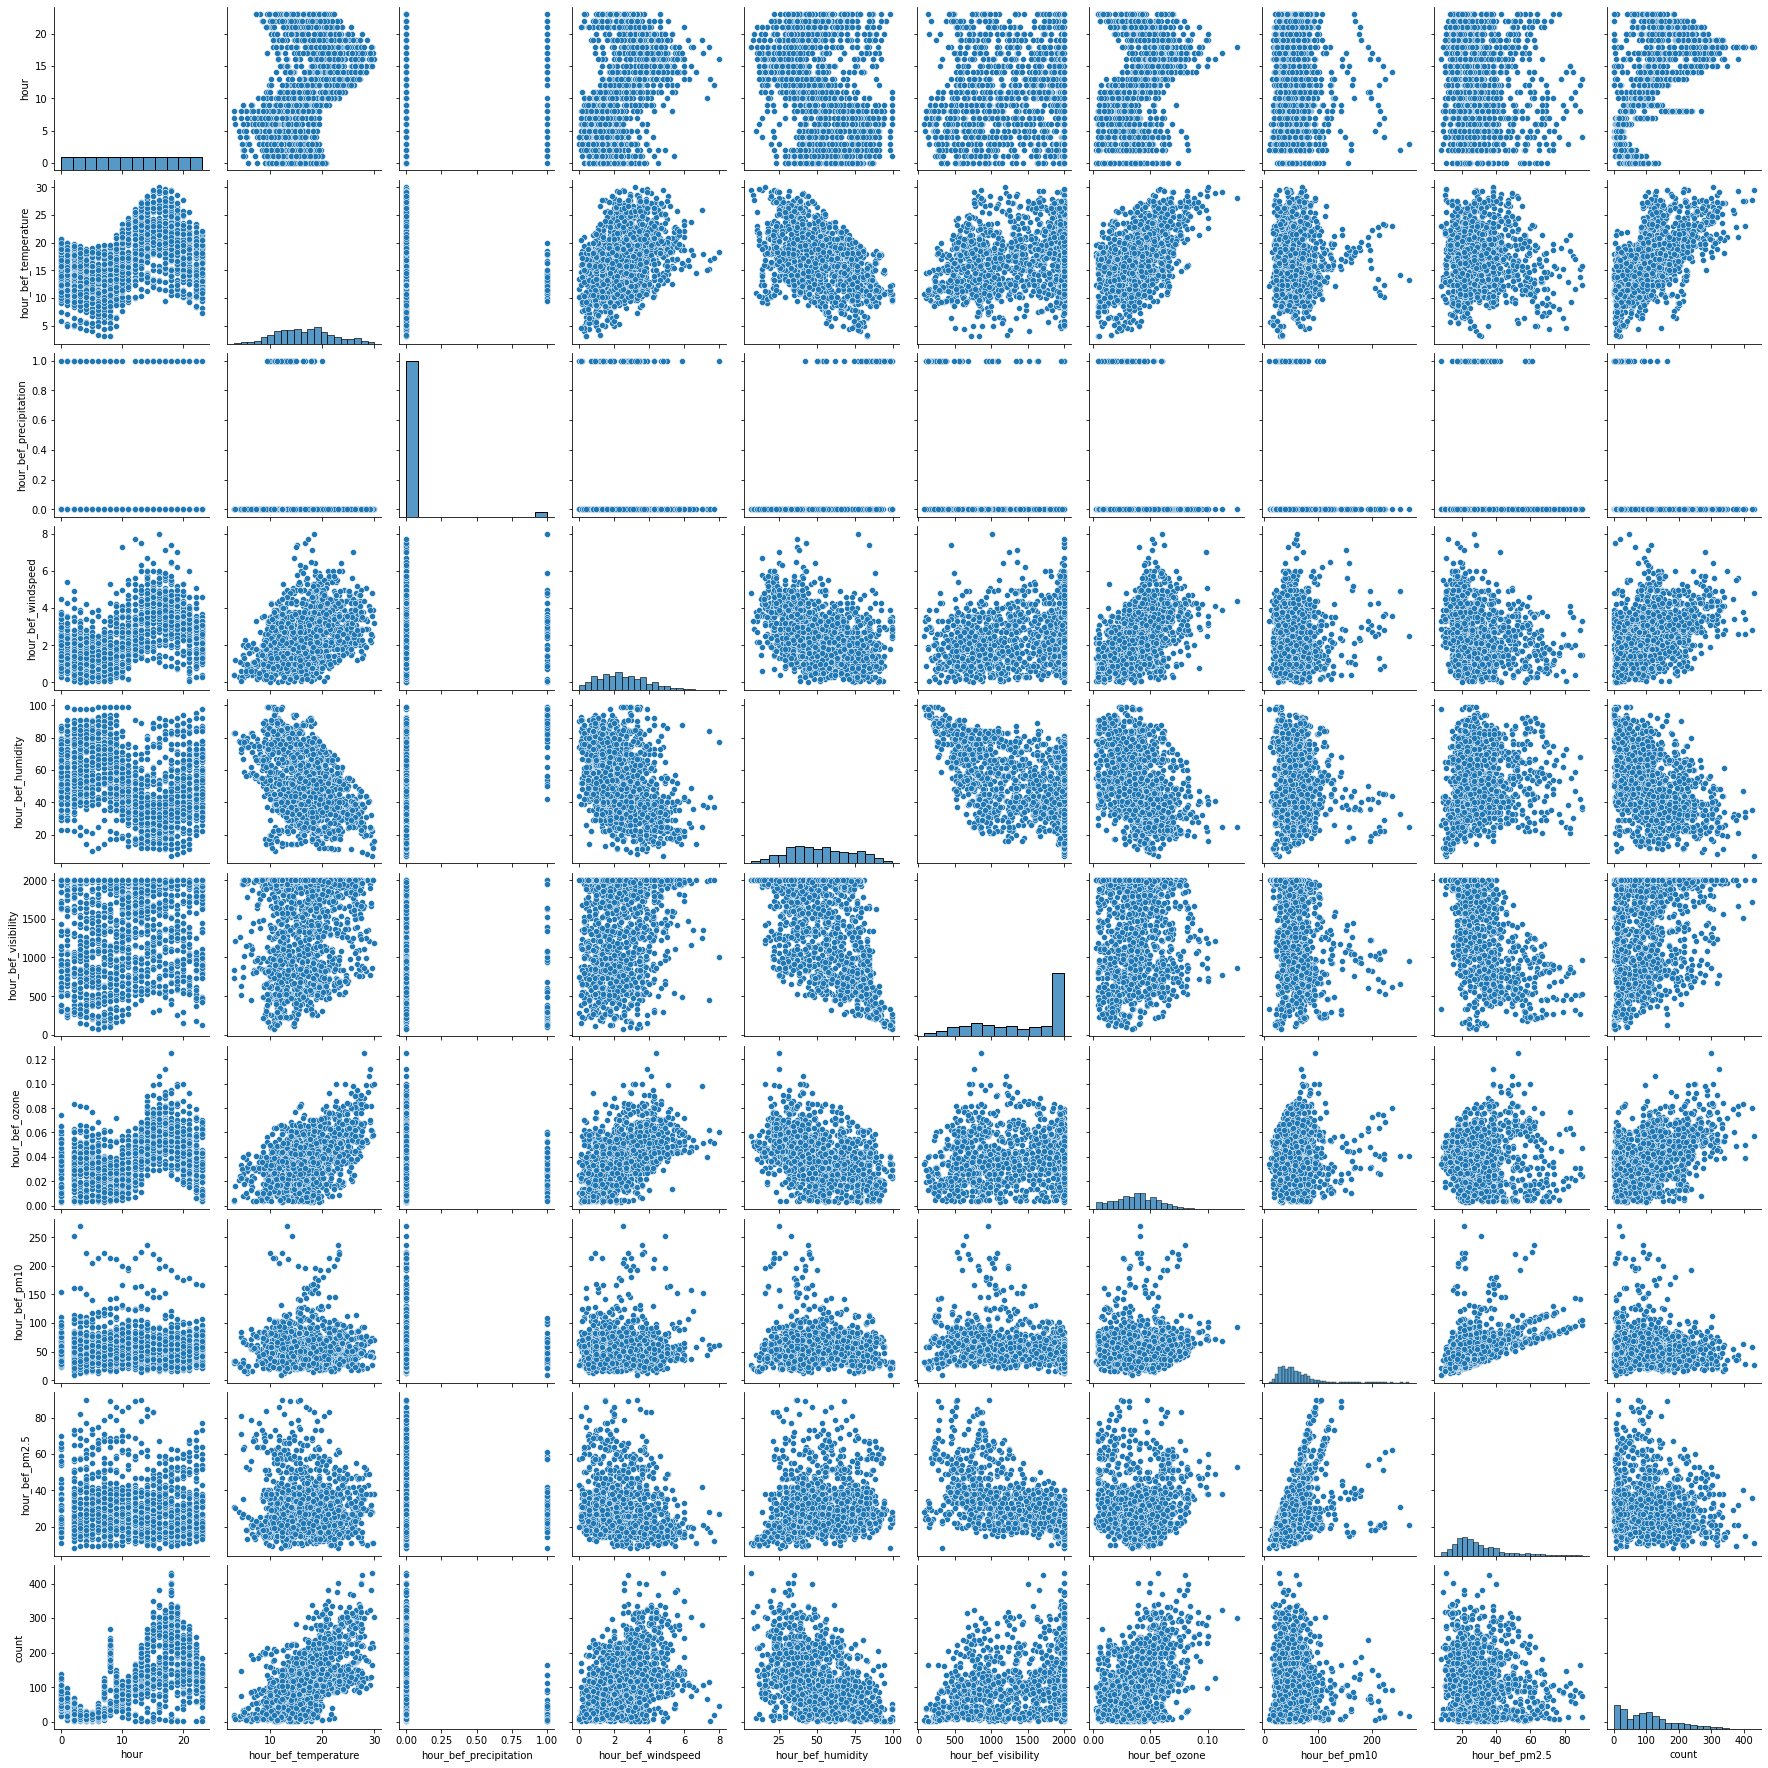

In [9]:
import seaborn as sns
sns.pairplot(train_cpy);

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='Density'>

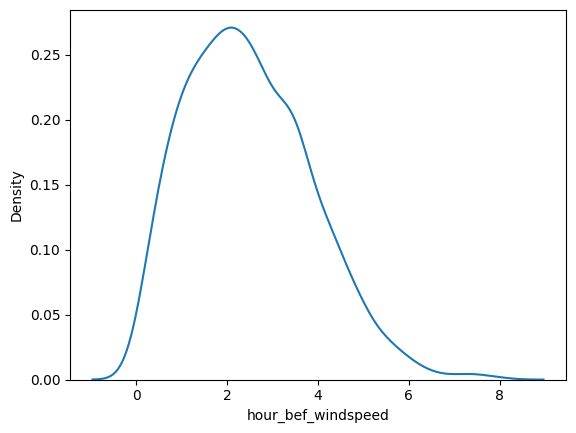

In [11]:
sns.kdeplot(train_cpy['hour_bef_windspeed'])

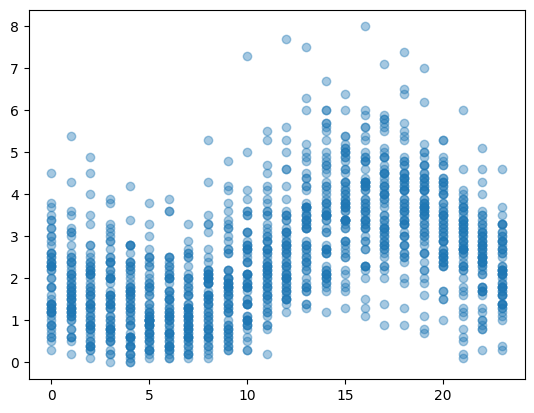

In [15]:
plt.scatter('hour','hour_bef_windspeed',data=train_cpy,alpha=.4)

In [12]:
train_cpy['hour_bef_visibility'].value_counts()

2000.0    339
990.0      12
1992.0      8
1994.0      7
1996.0      6
         ... 
574.0       1
951.0       1
1529.0      1
670.0       1
1262.0      1
Name: hour_bef_visibility, Length: 781, dtype: int64

In [13]:
drp_index=train_cpy[train_cpy['hour_bef_visibility']==2000].index
train_tmp=train_cpy.drop(drp_index,axis=0,inplace=False)
median=train_tmp['hour_bef_visibility'].median()
train_cpy[drp_index]['hour_bef_visibility']=median

KeyError: "None of [Int64Index([   4,   14,   16,   22,   28,   31,   34,   44,   45,   63,\n            ...\n            1426, 1431, 1432, 1434, 1437, 1441, 1445, 1454, 1455, 1456],\n           dtype='int64', length=339)] are in the [columns]"

In [14]:
train_cpy.loc[train_cpy['hour_bef_visibility']==2000,'hour_bef_visibility']=median

<AxesSubplot:>

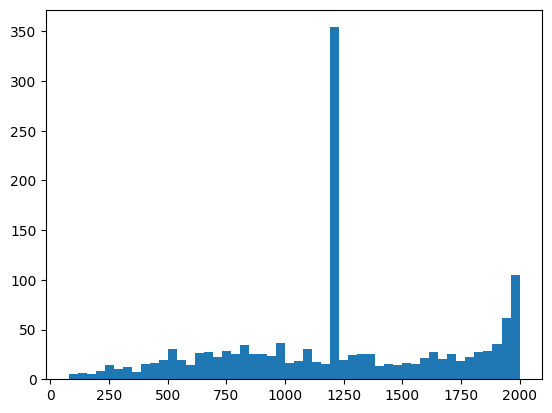

In [15]:
train_cpy['hour_bef_visibility'].hist(grid=False,bins=50)

In [ ]:
train_cpy_drp.corr().style.background_gradient()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.410316,0.036737,0.462494,-0.318628,0.162475,0.404712,-0.000127,0.003466,0.606252
hour_bef_temperature,0.410316,1.000000,-0.100365,0.385396,-0.541850,0.239798,0.572796,0.019878,-0.079426,0.603188
hour_bef_precipitation,0.036737,-0.100365,1.000000,0.046208,0.282802,-0.204429,-0.069165,-0.092458,-0.042843,-0.182831
hour_bef_windspeed,0.462494,0.385396,0.046208,1.000000,-0.397844,0.240640,0.514346,0.055073,-0.152500,0.438088
hour_bef_humidity,-0.318628,-0.541850,0.282802,-0.397844,1.000000,-0.562959,-0.433681,-0.278881,0.003650,-0.470105
hour_bef_visibility,0.162475,0.239798,-0.204429,0.240640,-0.562959,1.000000,0.119884,-0.263547,-0.553793,0.281363
hour_bef_ozone,0.404712,0.572796,-0.069165,0.514346,-0.433681,0.119884,1.000000,0.133009,0.039906,0.506982
hour_bef_pm10,-0.000127,0.019878,-0.092458,0.055073,-0.278881,-0.263547,0.133009,1.000000,0.397254,-0.053412
hour_bef_pm2.5,0.003466,-0.079426,-0.042843,-0.152500,0.003650,-0.553793,0.039906,0.397254,1.000000,-0.054821
count,0.606252,0.603188,-0.182831,0.438088,-0.470105,0.281363,0.506982,-0.053412,-0.054821,1.000000


<AxesSubplot:>

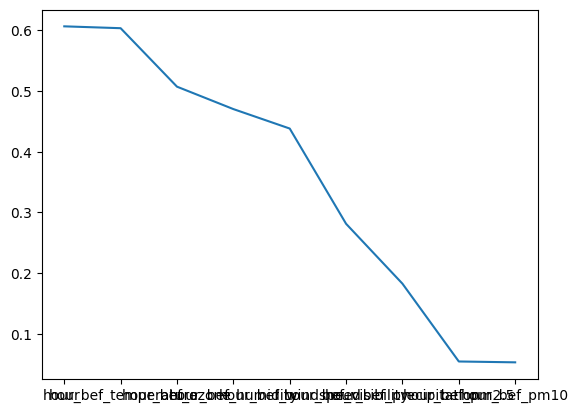

In [ ]:
abs(train_cpy_drp.corr()['count']).sort_values(ascending=False)[1:].plot()

(array([ 9., 10., 26., 27., 21., 30., 47., 51., 60., 54., 54., 26., 55.,
        55., 57., 46., 44., 27., 52., 40., 60., 57., 49., 25., 47., 31.,
        24., 17.,  5., 12.]),
 array([14.        , 16.83333333, 19.66666667, 22.5       , 25.33333333,
        28.16666667, 31.        , 33.83333333, 36.66666667, 39.5       ,
        42.33333333, 45.16666667, 48.        , 50.83333333, 53.66666667,
        56.5       , 59.33333333, 62.16666667, 65.        , 67.83333333,
        70.66666667, 73.5       , 76.33333333, 79.16666667, 82.        ,
        84.83333333, 87.66666667, 90.5       , 93.33333333, 96.16666667,
        99.        ]),
 <BarContainer object of 30 artists>)

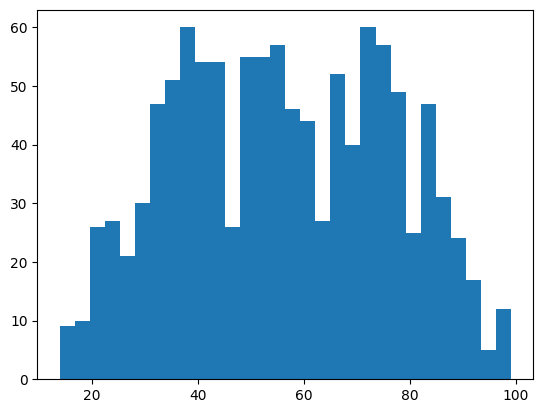

In [ ]:
plt.hist(train_cpy_drp['hour_bef_humidity'],bins=30)

In [ ]:
train_cpy.isnull().sum()

hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train_cpy.isnull().sum()/len(train)*100

hour                      0.000000
hour_bef_temperature      0.137080
hour_bef_precipitation    0.137080
hour_bef_windspeed        0.616861
hour_bef_humidity         0.137080
hour_bef_visibility       0.137080
hour_bef_ozone            5.209047
hour_bef_pm10             6.168609
hour_bef_pm2.5            8.019191
count                     0.000000
dtype: float64

### train_cpy fillna with median

In [ ]:
# for drop version
median=train_cpy_drp.median()
train_fil=train_cpy_drp.fillna(median,inplace=False)
train_fil.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
median=train_cpy.median()
train_fil=train_cpy.fillna(median,inplace=False)
train_fil.isnull().sum()

hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
train_set,valid_set=train_test_split(train_fil,test_size=.2,random_state=47)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
rf_reg=RandomForestRegressor(n_estimators=500)

In [ ]:
X_train=train_set.drop(['count'],axis=1)
y_train=train_set['count']
X_valid=valid_set.drop(['count'],axis=1)
y_valid=valid_set['count']

In [ ]:
def get_model_score(model,X_train,y_train,X_val,y_val):
    pred_tr_arr=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
    pred_val_arr=cross_val_score(model,X_val,y_val,scoring='neg_mean_squared_error',cv=5)
    print('train set RMSE : {}'.format(np.round(np.sqrt(np.mean(-1*pred_tr_arr)),2)))
    print('valid set RMSE : {}'.format(np.round(np.sqrt(np.mean(-1*pred_val_arr)),2)))

In [ ]:
from sklearn.model_selection import cross_val_score

get_model_score(lin_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 52.9
valid set RMSE : 52.72


In [ ]:
get_model_score(rf_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 39.45
valid set RMSE : 43.59


In [ ]:
rf_reg=RandomForestRegressor(n_estimators=1000)
get_model_score(rf_reg,X_train,y_train,X_valid,y_valid)

train set RMSE : 39.41
valid set RMSE : 43.49


### check feature importance

In [ ]:
rf_reg.fit(X_train,y_train)
ftr_importances_values=rf_reg.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
sorted_ftr_imp=ftr_importances.sort_values(ascending=False)

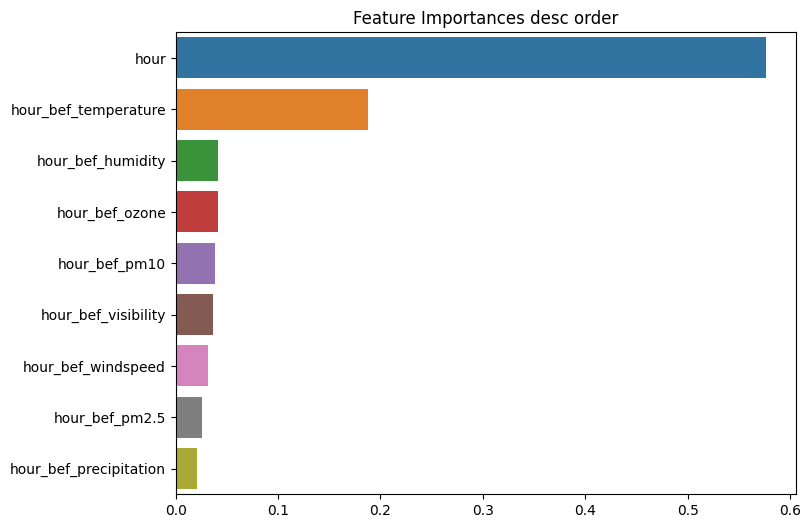

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances desc order')
sns.barplot(x=sorted_ftr_imp,y=sorted_ftr_imp.index)
plt.show()

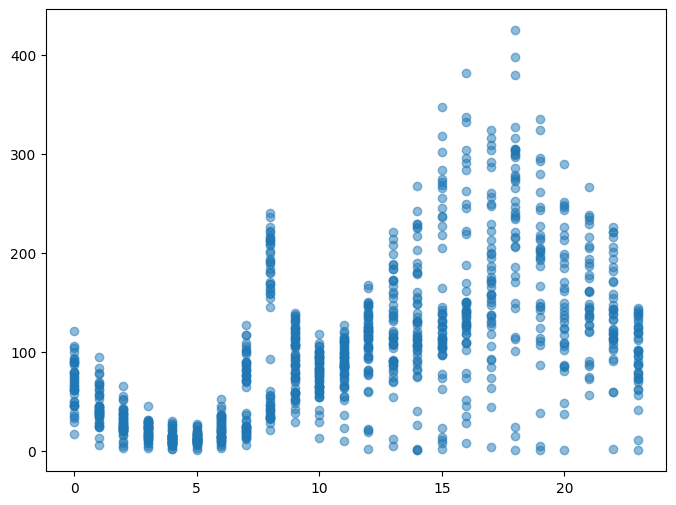

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=train_fil['hour'],y=train_fil['count'],alpha=.5,)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

n_estimators=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_depth=[int(x) for x in np.linspace(start=1,stop=100,num=10)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_reg=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,n_iter=100,
cv=5,verbose=2,random_state=42,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 12,
 'bootstrap': True}

In [ ]:
rf_best=RandomForestRegressor(
    n_estimators=2000,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=12,
    bootstrap=True)

get_model_score(rf_best,X_train,y_train,X_valid,y_valid)

train set RMSE : 42.12
valid set RMSE : 46.19


In [ ]:
X_train_full=train_fil.drop('count',axis=1)
y_train_full=train_fil['count']
rf_best.fit(X_train_full,y_train_full)

RandomForestRegressor(max_depth=56, n_estimators=733)

In [ ]:
drop_index=test_cpy[test_cpy['hour_bef_visibility']==2000].index
test_drp=test_cpy.drop(drop_index,axis=0,inplace=False)

In [ ]:
test_fil=test_drp.fillna(median)

In [ ]:
test_fil=test_cpy.fillna(median,inplace=False)

In [ ]:
pred=rf_best.predict(test_fil)

In [ ]:
submission_cpy['count']=pred
submission_cpy

,count
id,
0,97.401091
1,216.521146
2,81.712142
4,30.641201
5,72.342428
...,...
2148,57.759891
2149,72.682128
2165,123.291951


In [ ]:
submission_cpy.to_csv('jan05sub.csv')